In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


#load dataset
df=sns.load_dataset('titanic')


#handling missing values
print(df.isnull().sum())

print(df.shape)
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
m_df=df.drop(columns='deck',axis=1)
print(m_df.shape)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
(891, 15)
(891, 14)


In [4]:
#handling the duplicate values
print(f"Duplicated rows :{df.duplicated().sum()}")

d_df=m_df.drop_duplicates()
print("Duplicated rows are removed")
d_df.shape

Duplicated rows :107
Duplicated rows are removed


(780, 14)

In [5]:
#outliers detection (z-test) and treatment
numeric_column=d_df.select_dtypes(include=[np.number])
z_score=np.abs(stats.zscore(numeric_column))

out_df=d_df[(z_score>3).any(axis=1)]
print(f"outlier : {len(out_df)}")
c_df=d_df.drop(out_df.index)
print("outlier removed")
print(c_df.shape)
c_df

outlier : 63
outlier removed
(717, 14)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.000000,0,0,10.5000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [6]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

object_col=c_df.select_dtypes(include=['object']).columns
cat_col=c_df.select_dtypes(include=['category']).columns
bool_col=c_df.select_dtypes(include=['boolean']).columns
encode_col=list(object_col)+list(cat_col)+list(bool_col)
for col in encode_col:
  encoder=LabelEncoder()
  c_df[col]=encoder.fit_transform(c_df[col])
print(c_df.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  embark_town  alive  alone  
0           1            2      0      0  
1           0            0      1      0  
2           0            2      1      1  
3           0            2      1      0  
4           1            2      0      1  


In [7]:
# feature selection ()
from sklearn.feature_selection import VarianceThreshold

x=c_df.drop('survived',axis=1)
y=c_df['survived']
print(f"shape of the input data :{x.shape}")
v_selector=VarianceThreshold(threshold=0.3)
v_selector.fit_transform(x)

select_col=x.columns[v_selector.get_support()]

x_highvariance=x[select_col]
print("selecte feature by variance threshold")
print(x_highvariance.head())


shape of the input data :(717, 13)
selecte feature by variance threshold
   pclass   age  sibsp  parch     fare  embarked  class  who  embark_town
0       3  22.0      1      0   7.2500         2      2    1            2
1       1  38.0      1      0  71.2833         0      0    2            0
2       3  26.0      0      0   7.9250         2      2    2            2
3       1  35.0      1      0  53.1000         2      0    2            2
4       3  35.0      0      0   8.0500         2      2    1            2


In [8]:
#feature selection ( Feature vs Target Correlation)

corr_mat=x.corrwith(y)

selected_col1=[]
removed_col=[]
for i in range(len(corr_mat)):
  if np.abs(corr_mat.iloc[i])>0.3:
    selected_col1.append(corr_mat.index[i])
  else:
    removed_col.append(corr_mat.index[i])


x_hightcorr=x[selected_col1]
print(f"selected features {selected_col1}\n")
print(f"removed feature {removed_col}")

print(x_hightcorr.head())


selected features ['pclass', 'sex', 'fare', 'class', 'adult_male', 'alive']

removed feature ['age', 'sibsp', 'parch', 'embarked', 'who', 'embark_town', 'alone']
   pclass  sex     fare  class  adult_male  alive
0       3    1   7.2500      2           1      0
1       1    0  71.2833      0           0      1
2       3    0   7.9250      2           0      1
3       1    0  53.1000      0           0      1
4       3    1   8.0500      2           1      0


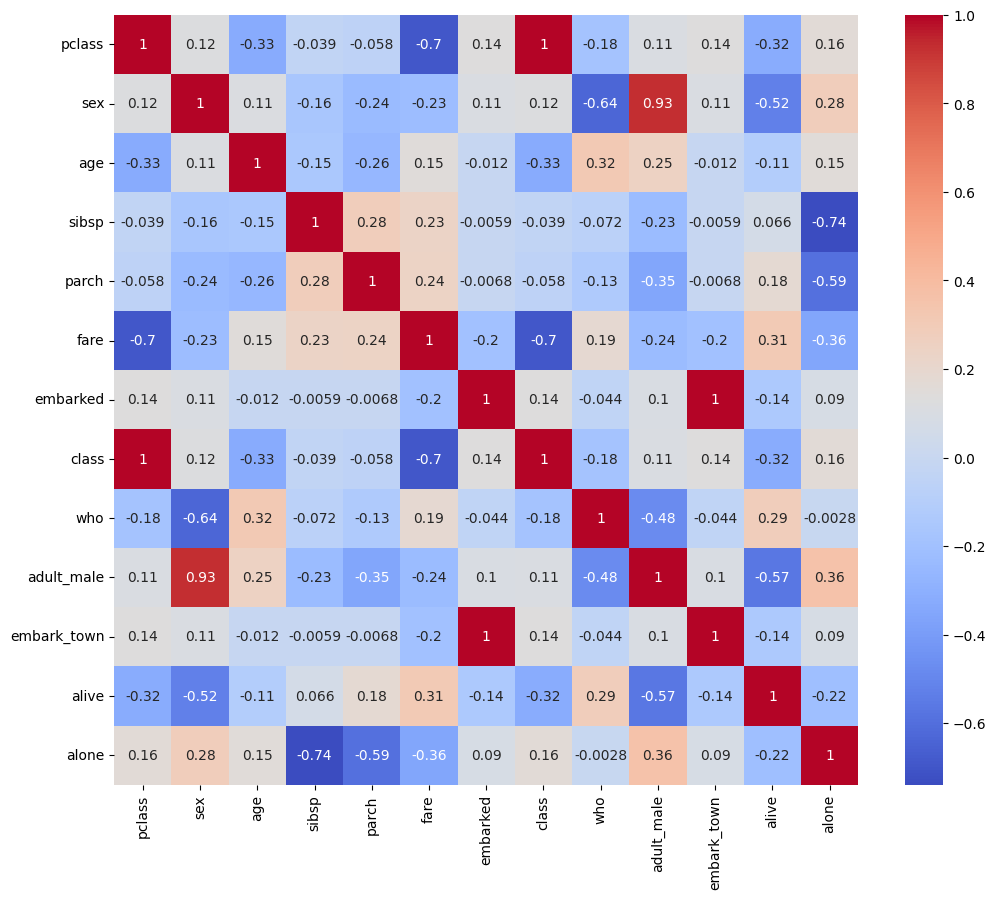

   pclass  sex   age  sibsp  parch  embarked
0       3    1  22.0      1      0         2
1       1    0  38.0      1      0         0
2       3    0  26.0      0      0         2
3       1    0  35.0      1      0         2
4       3    1  35.0      0      0         2
removed column ['fare', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


In [9]:
#feature selection (feature vs feature)

corr_mat1 = x.corr()  # Correlation matrix of features

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat1, annot=True, cmap='coolwarm')
plt.show()

x_lowcorr = x.copy()
removed_col1 = []

for i in range(len(corr_mat1.columns)):
  for j in range(i):
    if abs(corr_mat1.iloc[i, j]) > 0.5:
      colname = corr_mat1.columns[i]
      if colname in x_lowcorr.columns:  # Check if not already dropped
        removed_col1.append(colname)
        x_lowcorr = x_lowcorr.drop(colname, axis=1)
      break  # Drop only once per high-correlation pair

print(x_lowcorr.head())
print(f"removed column {removed_col1}")


In [28]:
#feature selection (chi square test)

from sklearn.feature_selection import chi2,SelectKBest

selector2 = SelectKBest(score_func=chi2, k=5)
selector2.fit_transform(x, y)

mask=selector2.get_support()
x_chi_col=x.columns[mask]
x_chi=x[x_chi_col]
print(f"selected feature {list(x_chi_col)}\n")
print(x_chi.head())


selected feature ['sex', 'age', 'fare', 'adult_male', 'alive']

   sex   age     fare  adult_male  alive
0    1  22.0   7.2500           1      0
1    0  38.0  71.2833           0      1
2    0  26.0   7.9250           0      1
3    0  35.0  53.1000           0      1
4    1  35.0   8.0500           1      0


In [31]:
#feature selection (chi square test)

from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


selector3 = SelectKBest(score_func=f_classif, k=5)
selector3.fit_transform(x, y)

mask=selector3.get_support()
x_anova_col=x.columns[mask]
x_anova=x[x_anova_col]
print(f"selected feature {list(x_anova_col)}\n")
print(x_anova.head())

selected feature ['pclass', 'sex', 'class', 'adult_male', 'alive']

   pclass  sex  class  adult_male  alive
0       3    1      2           1      0
1       1    0      0           0      1
2       3    0      2           0      1
3       1    0      0           0      1
4       3    1      2           1      0


In [34]:
#train test split
from sklearn.model_selection import train_test_split

x_new=x_chi
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=42)